# __Decision Tree - Classification__

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### __1. Data Gathering__

In [2]:
df = pd.read_csv("../data/heart.csv")
df.head(3)

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### __2. EDA__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
x = df.drop("target", axis=1)
y = df['target']

### __3. Model Training__

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25, stratify=y)

In [6]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### __4. Model Evaluation__

In [7]:
y_train_pred = dt.predict(x_train)
print(f"TRAINING ACCURACY: {accuracy_score(y_train, y_train_pred)}\n{'*'*55}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}\n{'*'*55}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, y_train_pred)}")

TRAINING ACCURACY: 1.0
*******************************************************
CONFUSION MATRIX:
[[103   0]
 [  0 124]]
*******************************************************
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [8]:
y_test_pred = dt.predict(x_test)
accuracy_score(y_test, y_test_pred)
print(f"TESTING ACCURACY: {accuracy_score(y_test, y_test_pred)}\n{'*'*55}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}\n{'*'*55}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_test_pred)}")

TESTING ACCURACY: 0.7368421052631579
*******************************************************
CONFUSION MATRIX:
[[25 10]
 [10 31]]
*******************************************************
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        35
           1       0.76      0.76      0.76        41

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



#### __4.1 Feature Insights__

In [9]:
print(f"I.G. :\n{dt.feature_importances_}\n")
print(f"Names:\n{dt.feature_names_in_}")

I.G. :
[0.07692364 0.02574608 0.24917232 0.08953878 0.17157817 0.
 0.03057048 0.0399588  0.03957373 0.06167007 0.02133897 0.11978932
 0.07413963]

Names:
['age' 'gender' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']


#### __4.2 Sorted Feature With Highest I.G. Order__

In [10]:
sorted(dict(zip(dt.feature_names_in_, dt.feature_importances_.round(4).tolist())).items(), key=lambda x:x[1], reverse=True)

[('cp', 0.2492),
 ('chol', 0.1716),
 ('ca', 0.1198),
 ('trestbps', 0.0895),
 ('age', 0.0769),
 ('thal', 0.0741),
 ('oldpeak', 0.0617),
 ('thalach', 0.04),
 ('exang', 0.0396),
 ('restecg', 0.0306),
 ('gender', 0.0257),
 ('slope', 0.0213),
 ('fbs', 0.0)]

### __5. Plotting Decision Tree__

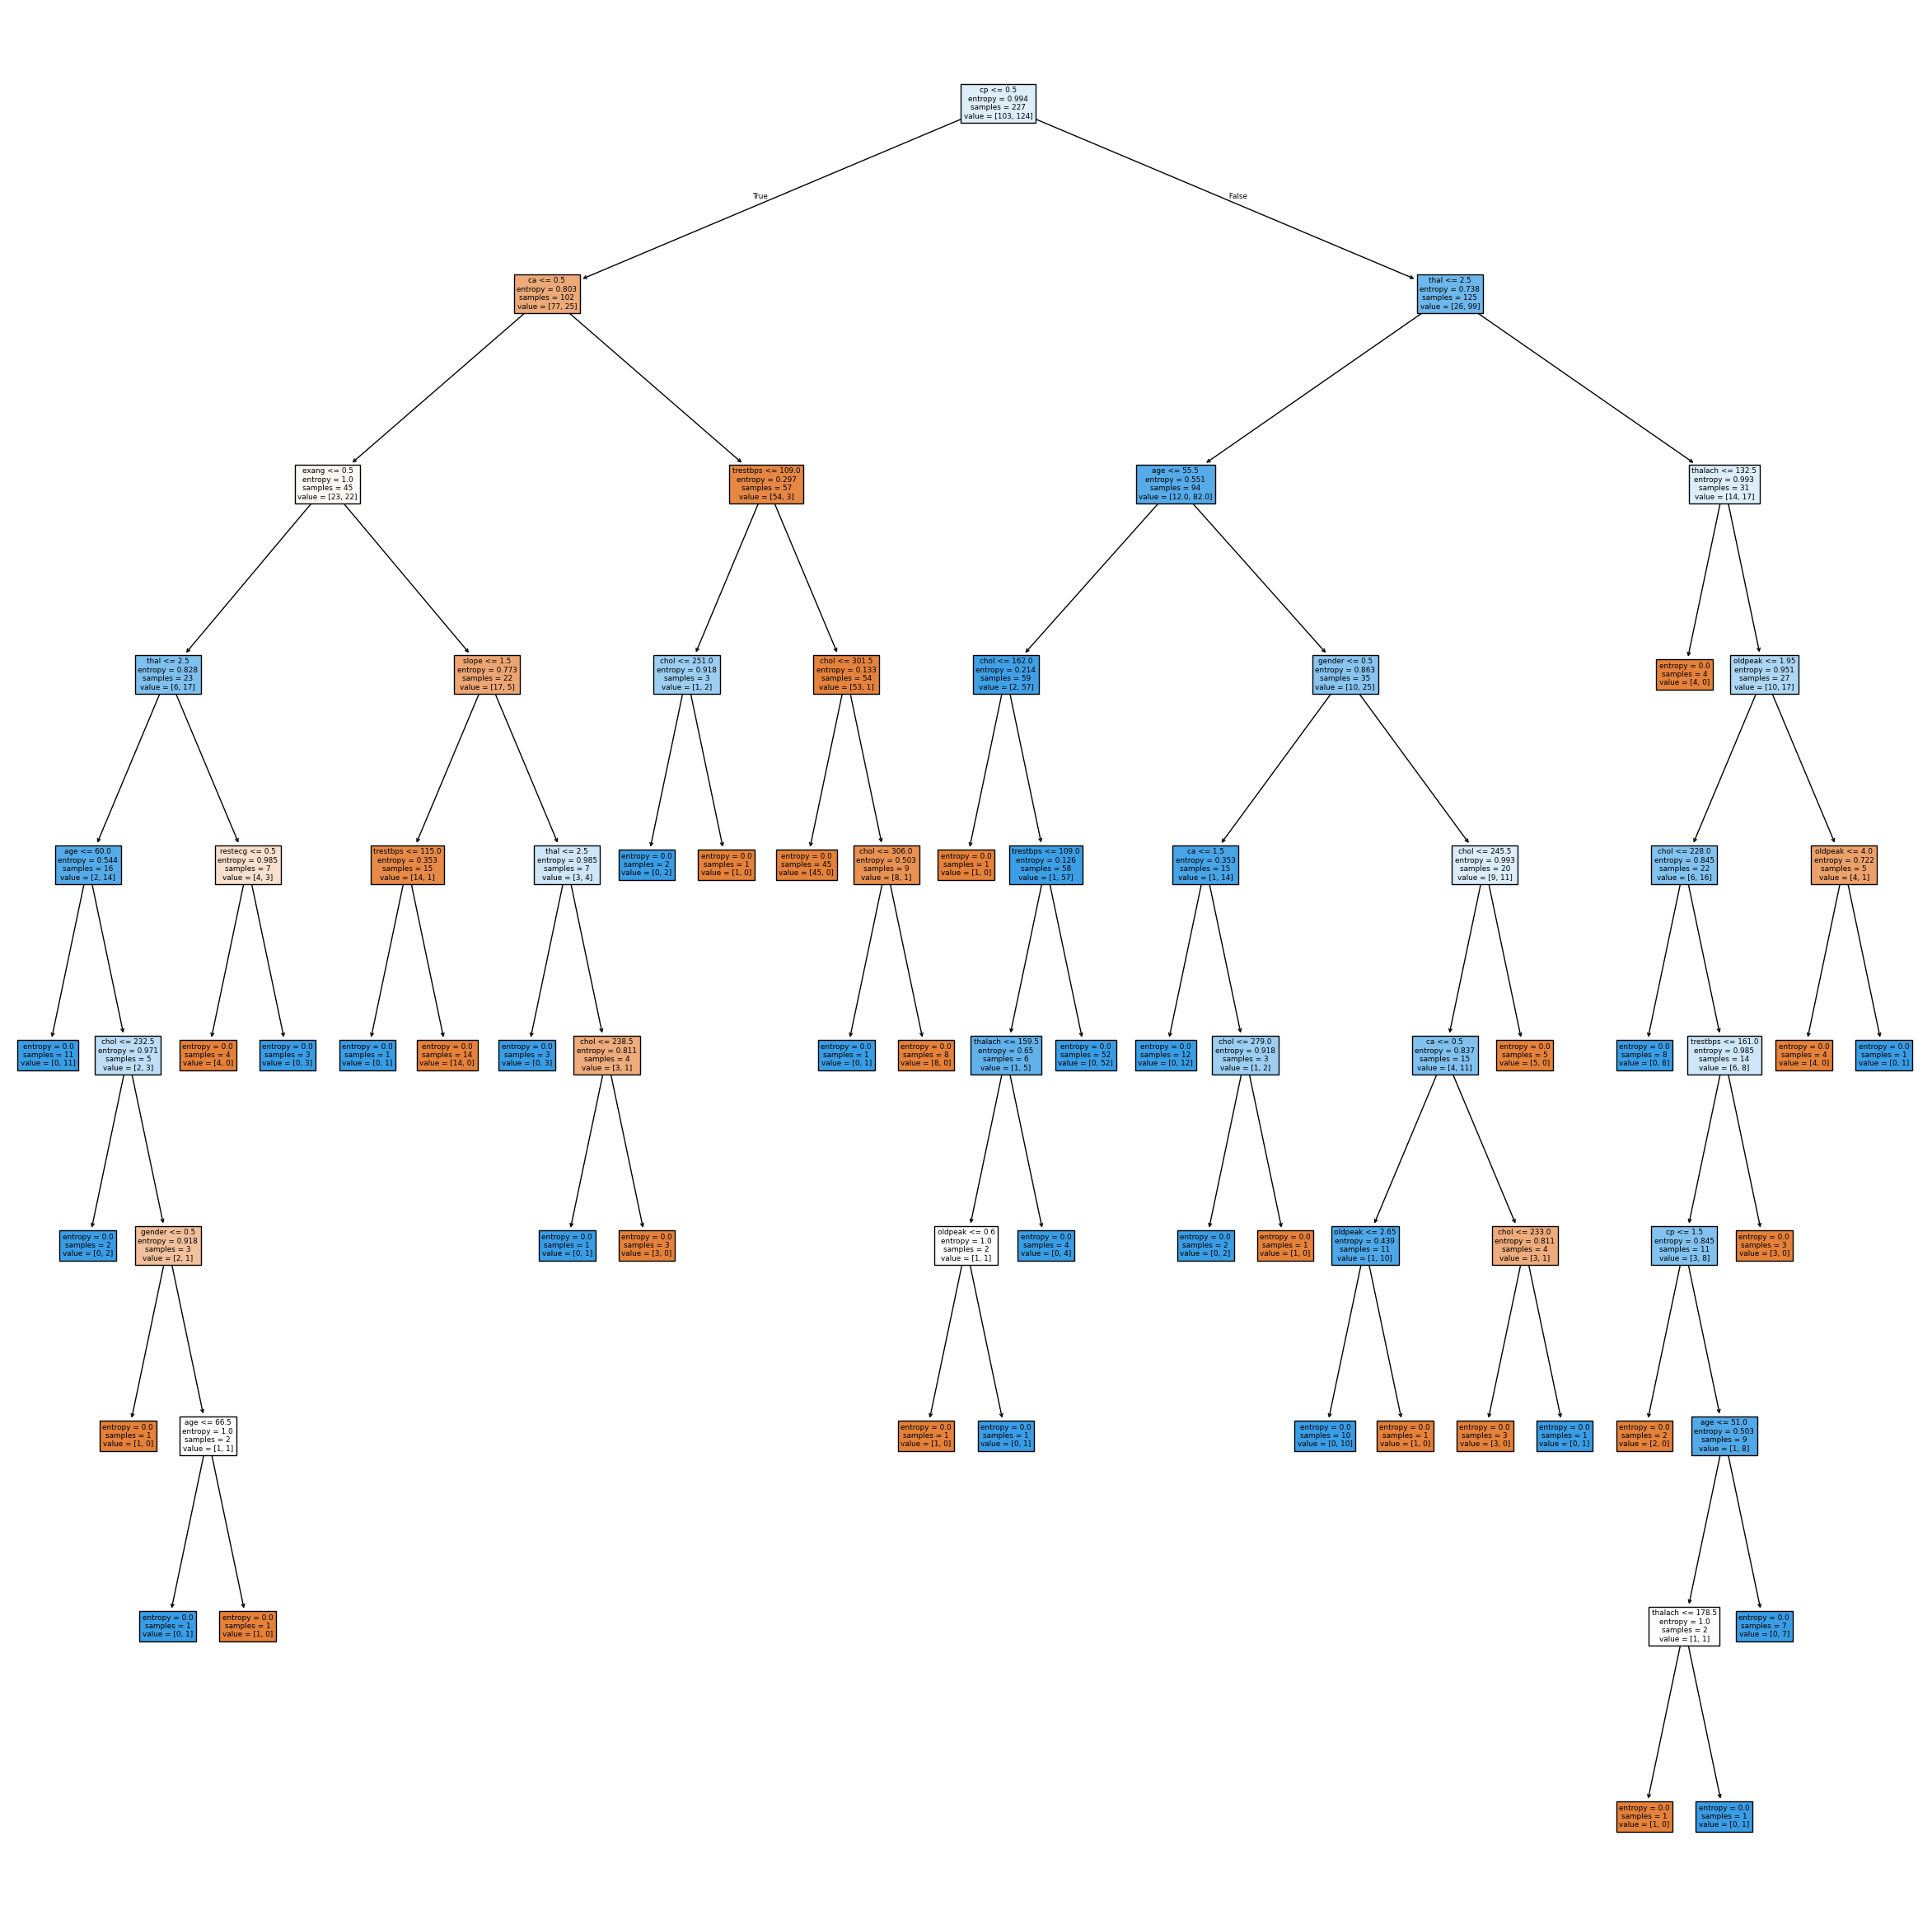

In [11]:
plt.figure(figsize=(30, 30))
plot_tree(dt, feature_names=dt.feature_names_in_, filled=True)
plt.show()

#### __5.1 Feature Weightage__

<Axes: >

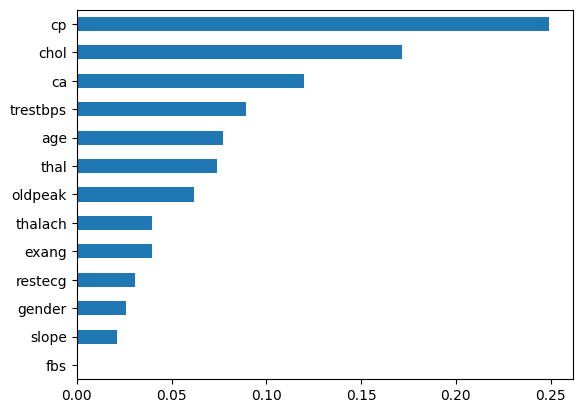

In [12]:
s1 = pd.Series(dt.feature_importances_, index = dt.feature_names_in_)
s1.sort_values().plot(kind = 'barh')

##  __Approach-1__ (_Improving Decision Tree Performance_)

# __6. Hyperparameter Optimization__

In [13]:
tuner = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": range(3,7),
    "min_samples_split": range(5,20),
    "min_samples_leaf": range(5, 12)
}

### __GridSearchCV__

In [14]:
grid_search = GridSearchCV(dt, tuner, n_jobs=-1, cv = 5, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(3, 7),
                         'min_samples_leaf': range(5, 12),
                         'min_samples_split': range(5, 20)},
             verbose=1)

### __6.1 Best Estimator for Decision Model__

In [15]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=5,
                       min_samples_split=7)

### __6.2 Model Training Using Best Estimator__

In [16]:
dt_new = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5, min_samples_split=6)
dt_new.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=6)

In [17]:
y_train_pred_new = dt_new.predict(x_train)
print(f"TRAINING ACCURACY: {accuracy_score(y_train, y_train_pred_new)}\n{'*'*55}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred_new)}\n{'*'*55}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, y_train_pred_new)}")

TRAINING ACCURACY: 0.8942731277533039
*******************************************************
CONFUSION MATRIX:
[[ 88  15]
 [  9 115]]
*******************************************************
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       103
           1       0.88      0.93      0.91       124

    accuracy                           0.89       227
   macro avg       0.90      0.89      0.89       227
weighted avg       0.89      0.89      0.89       227



In [18]:
y_test_pred_new = dt_new.predict(x_test)
accuracy_score(y_test, y_test_pred_new)
print(f"TESTING ACCURACY: {accuracy_score(y_test, y_test_pred_new)}\n{'*'*55}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred_new)}\n{'*'*55}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_test_pred_new)}")

TESTING ACCURACY: 0.8552631578947368
*******************************************************
CONFUSION MATRIX:
[[29  6]
 [ 5 36]]
*******************************************************
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



### __6.3 Feature Insights__

In [19]:
print(f"I.G. :\n{dt_new.feature_importances_}\n")
print(f"Names:\n{dt_new.feature_names_in_}")

I.G. :
[0.09679737 0.03101795 0.31576208 0.         0.1440201  0.
 0.02299757 0.07798943 0.07880148 0.         0.02954885 0.12281453
 0.08025064]

Names:
['age' 'gender' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']


### __6.4 Sorted Feature With Highest I.G. Order__

In [20]:
sorted(dict(zip(dt_new.feature_names_in_, dt_new.feature_importances_.round(4).tolist())).items(), key=lambda x:x[1], reverse=True)

[('cp', 0.3158),
 ('chol', 0.144),
 ('ca', 0.1228),
 ('age', 0.0968),
 ('thal', 0.0803),
 ('exang', 0.0788),
 ('thalach', 0.078),
 ('gender', 0.031),
 ('slope', 0.0295),
 ('restecg', 0.023),
 ('trestbps', 0.0),
 ('fbs', 0.0),
 ('oldpeak', 0.0)]

### __6.5 Plotting Decision Tree__

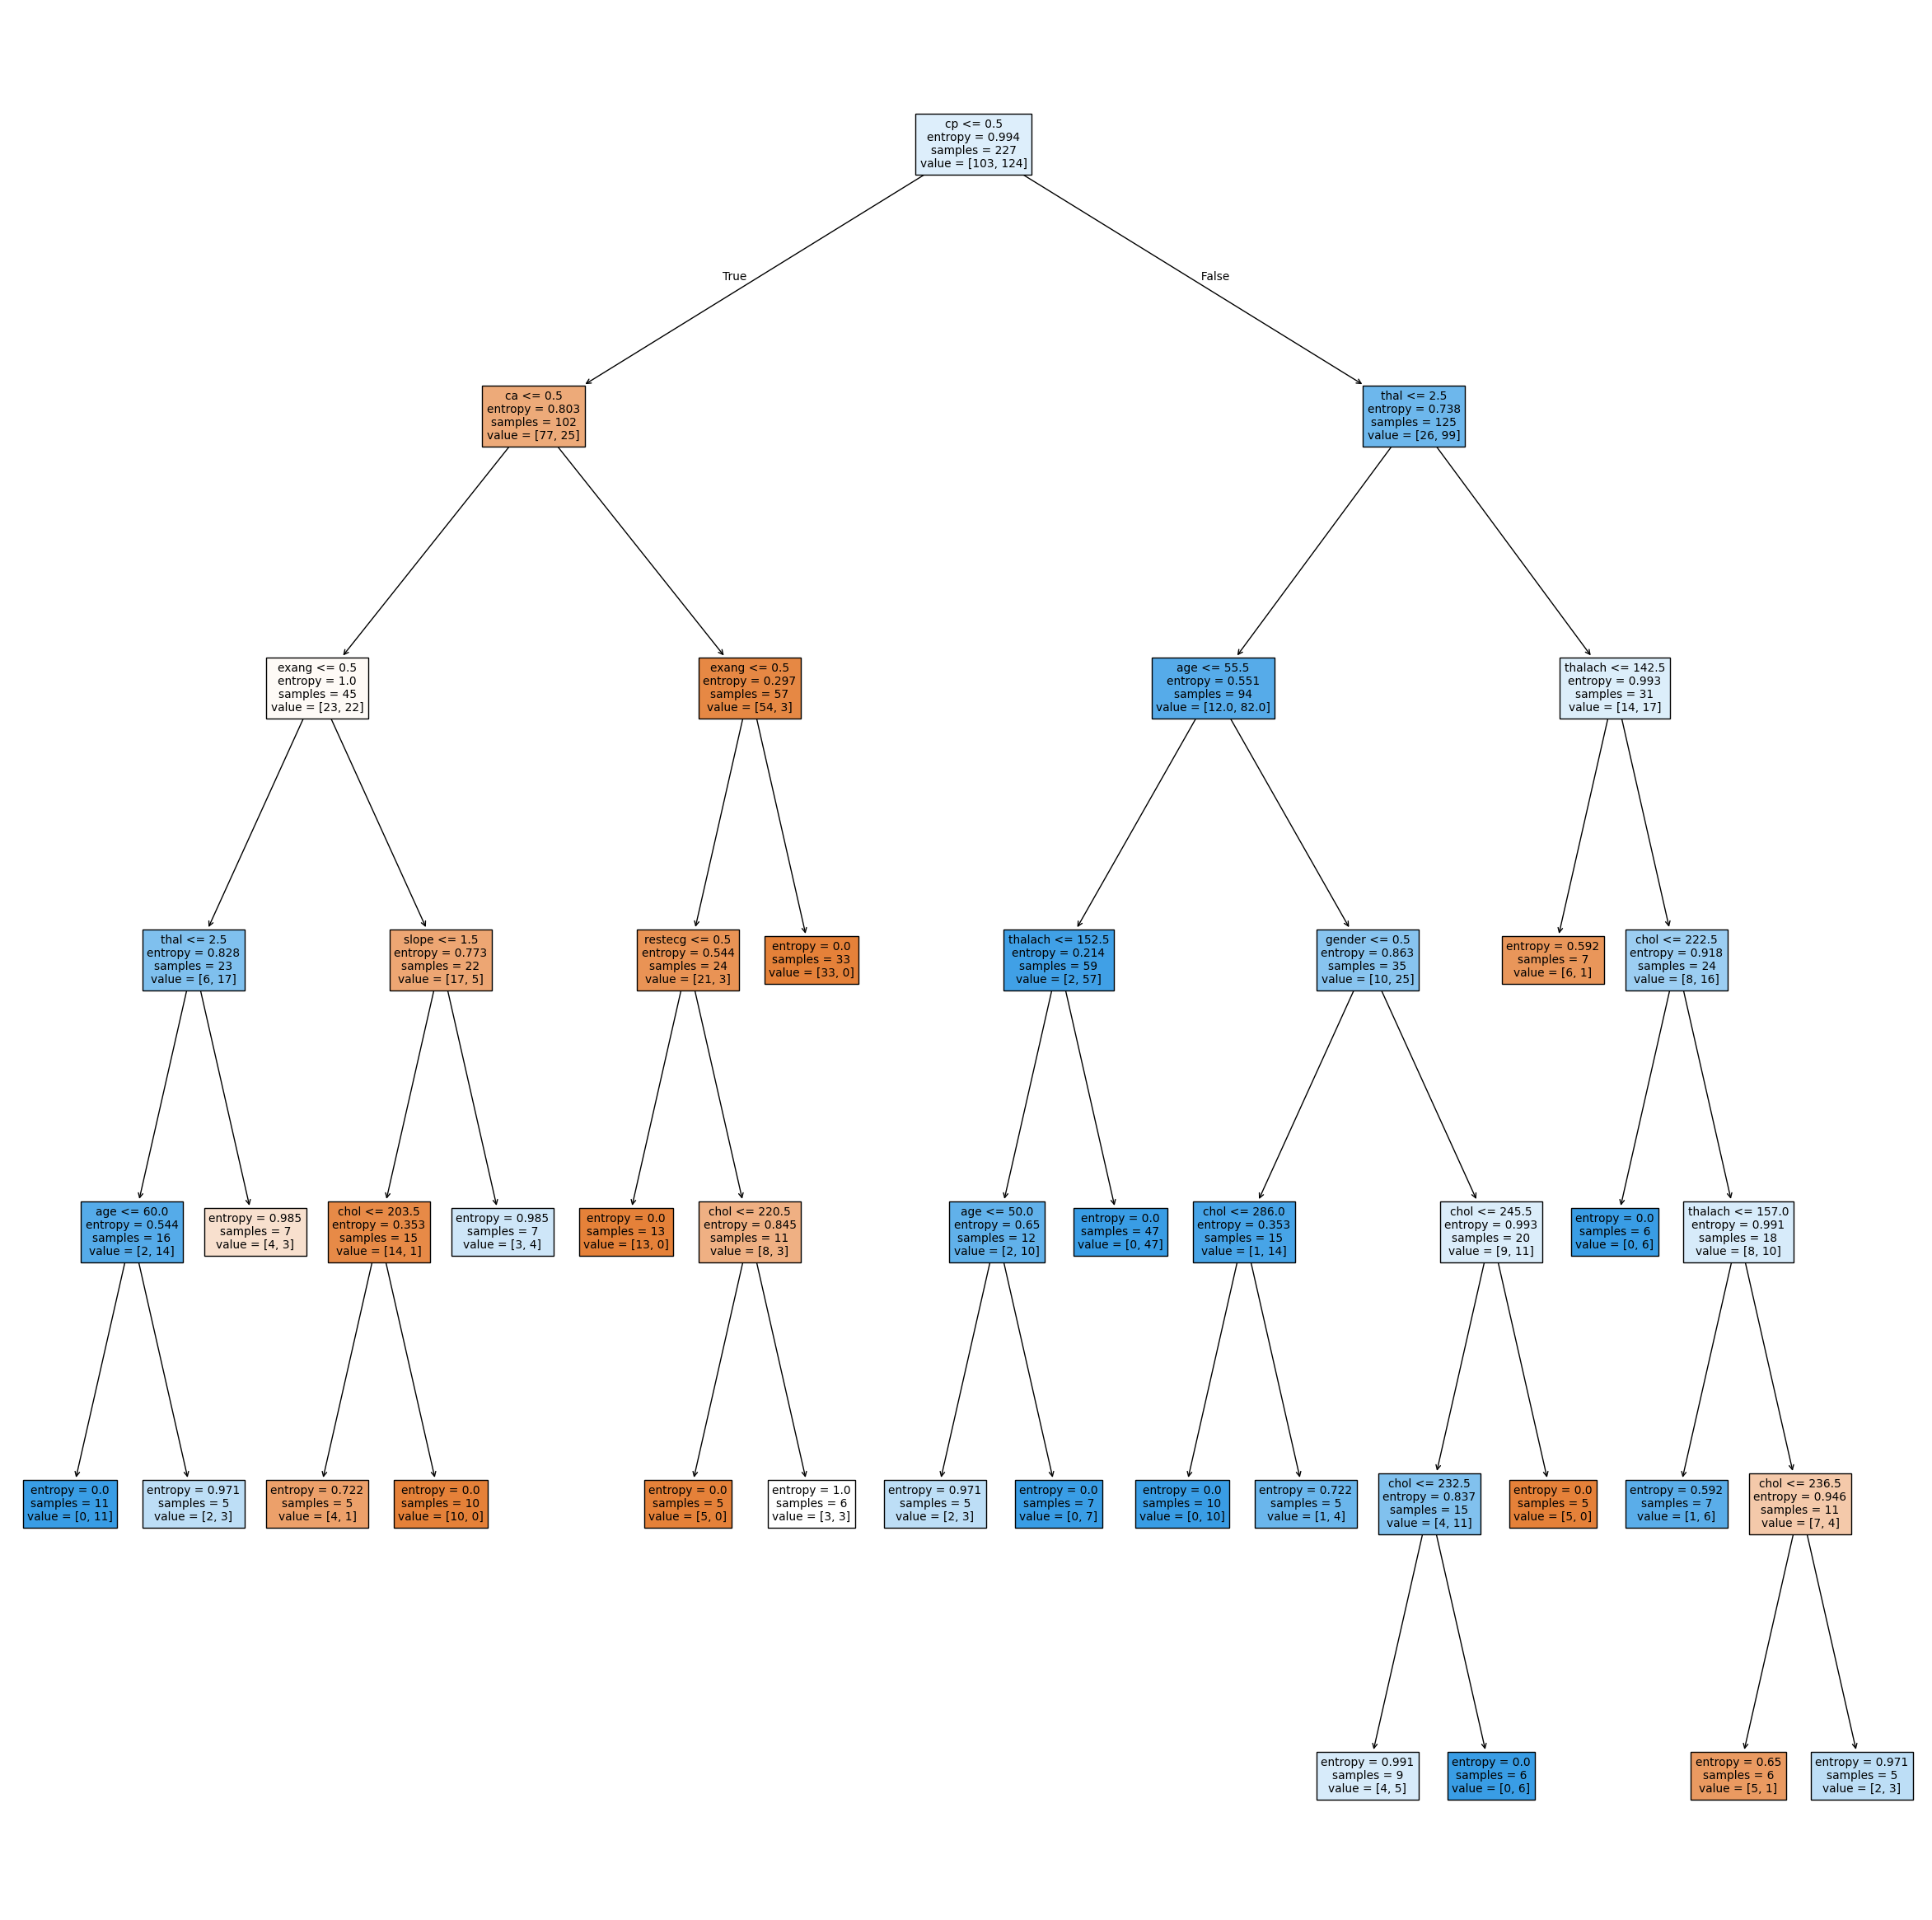

In [21]:
plt.figure(figsize=(30, 30))
plot_tree(dt_new, feature_names=dt_new.feature_names_in_, filled=True)
plt.show()

### __6.6 Feature Weightage__

<Axes: >

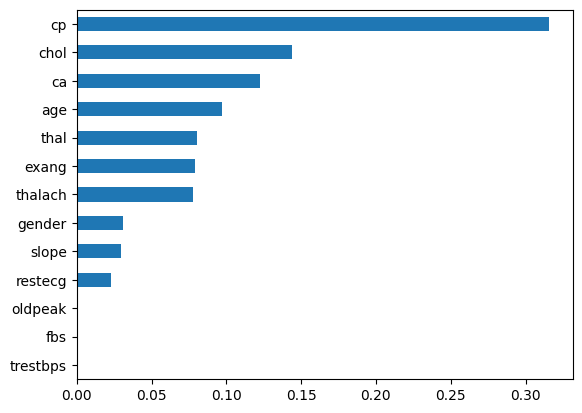

In [22]:
s2 = pd.Series(dt_new.feature_importances_, index = dt_new.feature_names_in_)
s2.sort_values().plot(kind = 'barh')

## __Approach - 2__ (_Improving Decision Tree Performance_)
# __7. Post Pruning__

__Finding Cost Complexity__

In [23]:
ccp = dt.cost_complexity_pruning_path(x_train, y_train).ccp_alphas
ccp

array([0.        , 0.00606803, 0.0085906 , 0.00881057, 0.00925051,
       0.0111424 , 0.01167487, 0.01213607, 0.01429565, 0.01429565,
       0.01492525, 0.0158241 , 0.0159015 , 0.01608583, 0.01692634,
       0.01931371, 0.02049449, 0.02227839, 0.02253055, 0.0227935 ,
       0.02340547, 0.02722295, 0.03091141, 0.03932908, 0.03956876,
       0.04238992, 0.0881433 , 0.22662069])

### __7.1 Calculating Accuracies__

In [24]:
train_list = list()
test_list = list()

for x in ccp:
    dt_approach2 = DecisionTreeClassifier(ccp_alpha=x)
    dt_approach2.fit(x_train, y_train)
    train_list.append(dt_approach2.score(x_train, y_train))

    dt_approach2.fit(x_test, y_test)
    test_list.append(dt_approach2.score(x_test, y_test))

### __7.2 Plotting Accuracy__

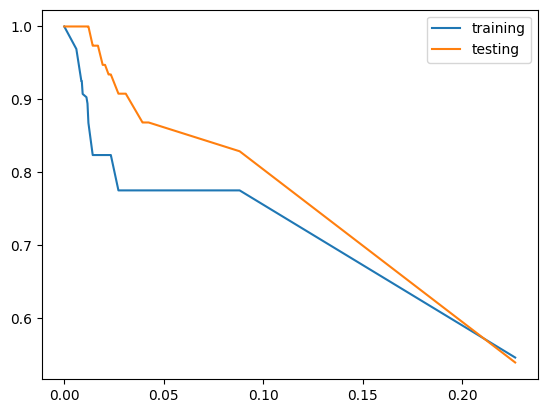

In [25]:
plt.plot(ccp, train_list, label="training")
plt.plot(ccp, test_list, label="testing")
plt.legend()

### __7.3 Model Training__

In [26]:
dt_post_prune = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.05)
dt_post_prune.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy')

### __7.4 Model Evaluation__

In [27]:
y_train_pred_prune = dt_post_prune.predict(x_train)
print(f"TRAINING ACCURACY: {accuracy_score(y_train, y_train_pred_prune)}\n{'*'*55}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred_prune)}\n{'*'*55}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, y_train_pred_prune)}")

TRAINING ACCURACY: 0.775330396475771
*******************************************************
CONFUSION MATRIX:
[[77 26]
 [25 99]]
*******************************************************
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       103
           1       0.79      0.80      0.80       124

    accuracy                           0.78       227
   macro avg       0.77      0.77      0.77       227
weighted avg       0.78      0.78      0.78       227



In [28]:
y_test_pred_prune = dt_post_prune.predict(x_test)
accuracy_score(y_test, y_test_pred_prune)
print(f"TESTING ACCURACY: {accuracy_score(y_test, y_test_pred_prune)}\n{'*'*55}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred_prune)}\n{'*'*55}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_test_pred_prune)}")

TESTING ACCURACY: 0.7105263157894737
*******************************************************
CONFUSION MATRIX:
[[27  8]
 [14 27]]
*******************************************************
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.77      0.66      0.71        41

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.72      0.71      0.71        76



### __7.5 Plotting Decision Tree__

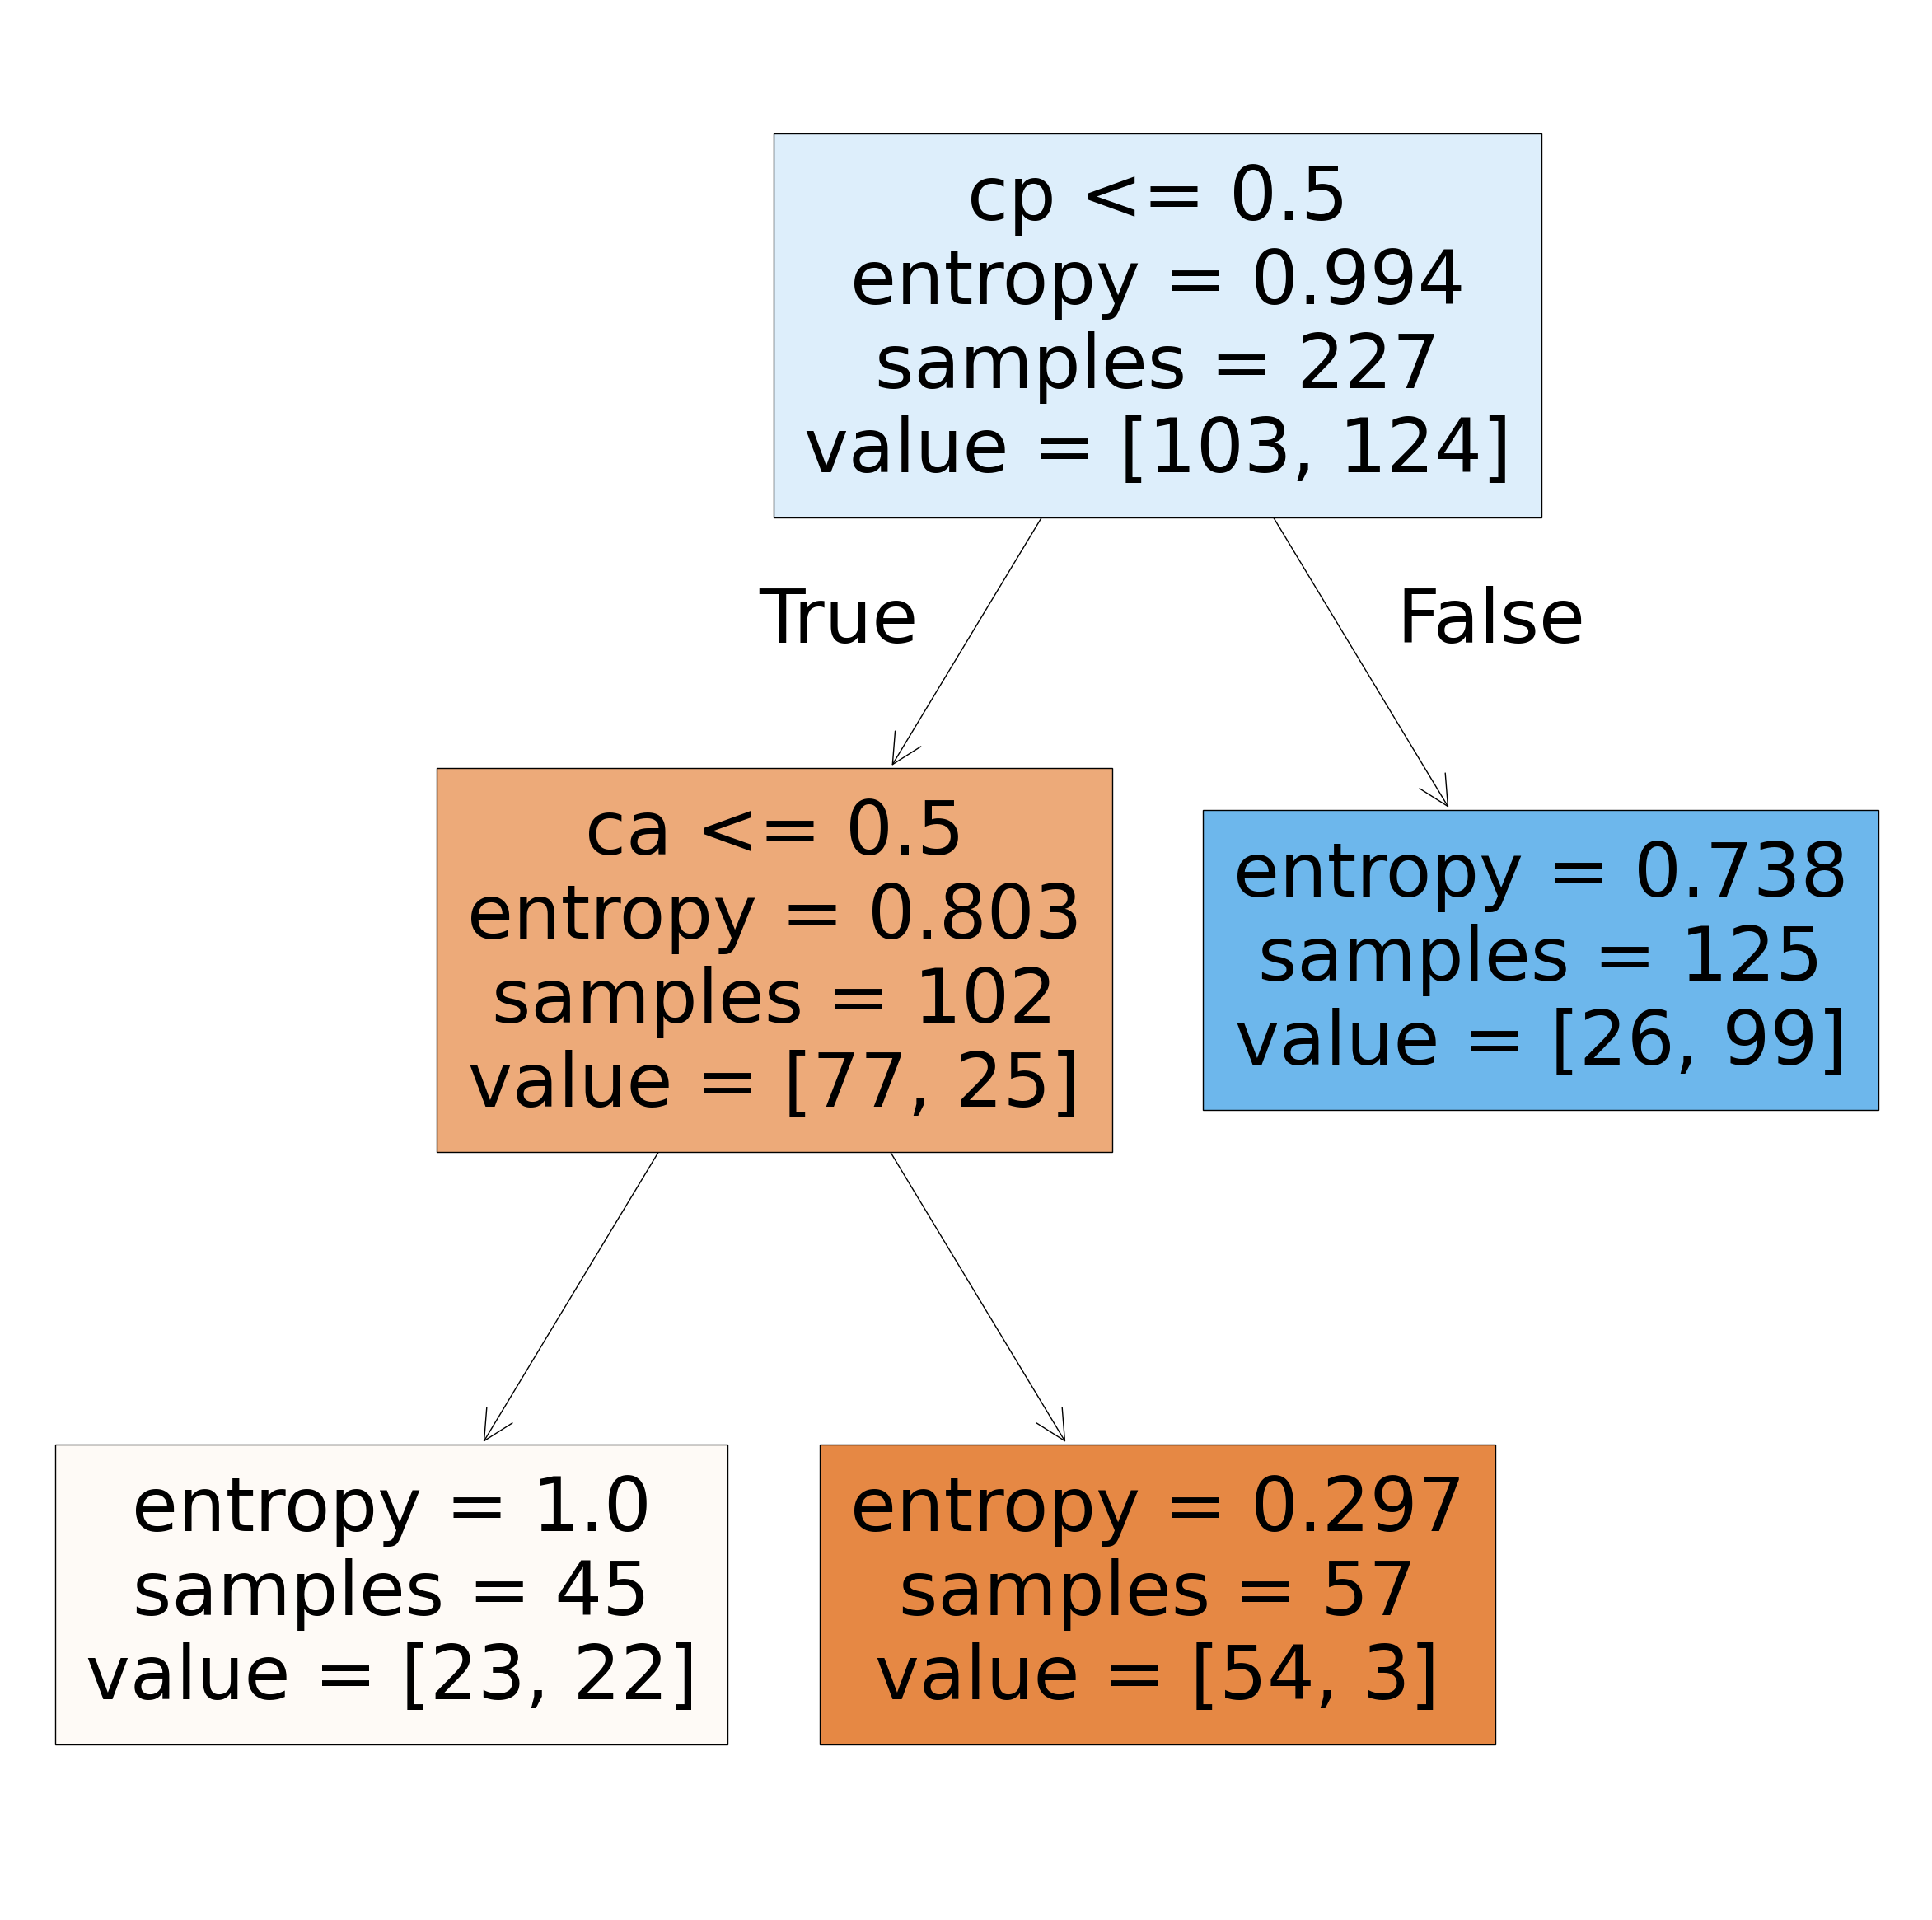

In [29]:
plt.figure(figsize=(30, 30))
plot_tree(dt_post_prune, feature_names=dt_post_prune.feature_names_in_, filled=True)
plt.show()

### __7.6 Feature Weightage__

<Axes: >

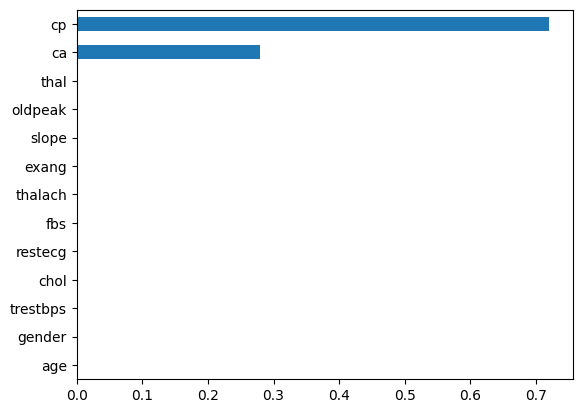

In [30]:
s3 = pd.Series(dt_post_prune.feature_importances_, index = dt_post_prune.feature_names_in_)
s3.sort_values().plot(kind = 'barh')

# __8. Conclusion__

In [31]:
conclusion = {
    "Approach": ["Without Tune", "Hyperparameter - GridSearchCV", "Post Pruning"],
    "Training Accuracy": [accuracy_score(y_train, y_train_pred), accuracy_score(y_train, y_train_pred_new), accuracy_score(y_train, y_train_pred_prune)],
    "Testing Accuracy": [accuracy_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred_new), accuracy_score(y_test, y_test_pred_prune)]
}

In [32]:
pd.DataFrame(conclusion)

,Approach,Training Accuracy,Testing Accuracy
0,Without Tune,1.000000,0.736842
1,Hyperparameter - GridSearchCV,0.894273,0.855263
2,Post Pruning,0.775330,0.710526


#### From the comparison of the three approaches, it is evident that __Hyperparameter tuning using GridSearchCV__ provided the best overall performance.

1. The baseline model (without tuning) achieved perfect training accuracy (1.0), indicating overfitting, as the testing accuracy dropped significantly to 0.7368.

2. The GridSearchCV-tuned model struck a good balance between training (0.8943) and testing (0.8553) accuracy, showing improved generalization and reduced overfitting.

3. The post-pruned model had the lowest accuracies on both training (0.7753) and testing (0.7105) sets, suggesting underfitting due to excessive simplification of the tree.

- __Overall, hyperparameter tuning via GridSearchCV yielded the most effective and generalizable decision tree model among the three approaches.__